In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#This dataset was used by permission by my uncle, and I have dropped any personal information to protect owner privacy.
df = pd.read_csv('hth_property_data.csv')
pd.set_option('display.max_columns', None)
df.columns.to_list()


display(df.isna().sum())
display(df.shape)


Property Type                   0
Property Use                    0
Land Use                        0
Beds                            5
Baths                           5
Rooms Count                     0
Units Count                     0
Stories                         8
Building Size (sqft)            3
Lot Size (sqft)                 0
Year Built                      3
Years Owned                    27
Pool                            0
Pool Area                       0
Garage                          0
Basement                        0
Deck                            0
Deck Area                       0
Patio                           0
Patio Area                      0
Air Conditioning                0
Roof Construction             543
Roof Material                 543
Estimated Value                 0
Assessed Value                  0
Assessed Land Value             0
Assessed Improvement Value      0
Price Per Sqft                  0
Last Sale Date                  4
Last Sale Amou

(543, 38)

In [50]:
#Dropping NA columns
df = df.dropna(axis=1, how='all')
df.isna().sum()

Property Type                  0
Property Use                   0
Land Use                       0
Beds                           5
Baths                          5
Rooms Count                    0
Units Count                    0
Stories                        8
Building Size (sqft)           3
Lot Size (sqft)                0
Year Built                     3
Years Owned                   27
Pool                           0
Pool Area                      0
Garage                         0
Basement                       0
Deck                           0
Deck Area                      0
Patio                          0
Patio Area                     0
Air Conditioning               0
Estimated Value                0
Assessed Value                 0
Assessed Land Value            0
Assessed Improvement Value     0
Price Per Sqft                 0
Last Sale Date                 4
Last Sale Amount               0
Last Sale Arms Length          4
Prior Sale Amount             68
Recording 

335    4361000
69     3937395
119    3615390
244    3590000
187    3116000
Name: Estimated Value, dtype: int64


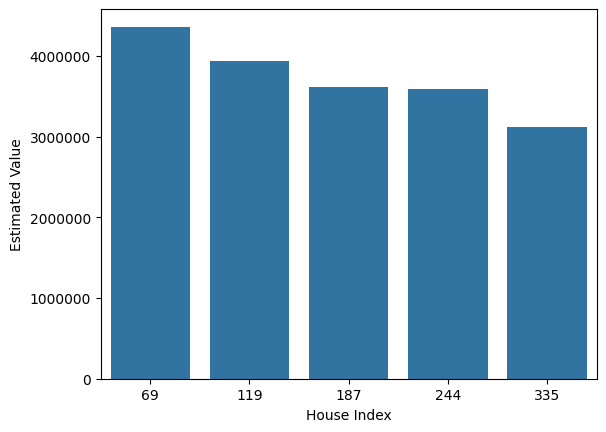

In [55]:
#Q1: What are the prices of the 5 most expensive homes in Oakland, CA?

most_exp = df['Estimated Value'].nlargest(5)

print(most_exp)




ax = sns.barplot(x=most_exp.index.sort_values(), y=most_exp)
#Had to ask chatGPT for tick scales. It still failed on what axis to choose lmao.
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('House Index');




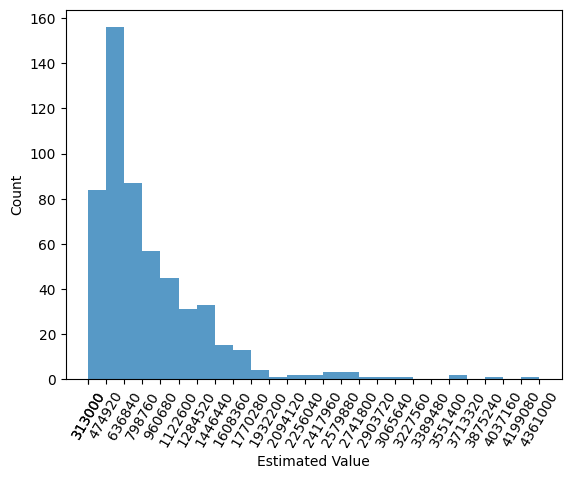

In [ ]:
#Q2: What are the range and quantities of homes in set price ranges?
lower_value = int(df['Estimated Value'].min())
upper_value = int(df['Estimated Value'].max())

#print(lower_value, upper_value)

def bins(lower, upper, steps):
    bins = []
    price_range = upper - lower
    bin_step = price_range // steps

    bins.append(lower)

    for i in range(int(steps + 1)):
        value = lower + (bin_step * i)
        bins.append(value)
    return bins






bin_vals = bins(lower_value, upper_value, 25)
hist_plot = sns.histplot(data=df, x='Estimated Value', bins=bin_vals)
hist_plot.ticklabel_format(style='plain', axis='x')
hist_plot.set_xticks(bin_vals)
hist_plot.set_xticklabels(bin_vals, rotation=60);
#Apparently adding a semicolon makes it not print according to chatGPT. What is python atp.. 


In [ ]:
#Q3: How many homeowners are there in comparison to real estate companies?

homeowners_count = df['Cash Buyer']



0       No
1       No
2      Yes
3       No
4       No
      ... 
538    Yes
539     No
540     No
541     No
542    Yes
Name: Cash Buyer, Length: 543, dtype: object